<a href="https://colab.research.google.com/github/ssstoev/ssstoev/blob/main/Cats_vs_Dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Cats vs Dogs Classifier
We use the classical VGG architecture using 3 blocks consisting of convolutional layers with 3x3 filters followed by a max pooling layer.

In [1]:
import pandas as pd
from pathlib import Path
import zipfile
import os

In [2]:
!wget --no-check-certificate \
    "https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip" \
    -O "/tmp/cats-and-dogs.zip"


zip_ref = zipfile.ZipFile('/tmp/cats-and-dogs.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2024-06-11 06:37:11--  https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/laxmimerit/dog-cat-full-dataset/zip/refs/heads/master [following]
--2024-06-11 06:37:11--  https://codeload.github.com/laxmimerit/dog-cat-full-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs.     [      <=>           ] 545.70M  36.9MB/s    in 15s     

2024-06-11 06:37:26 (36.9 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [572212372]



In [3]:
# Let's find out how many images we have in total

print('Test set dogs' , len(os.listdir('/tmp/dog-cat-full-dataset-master/data/test/dogs')))
print('Test set cats' , len(os.listdir('/tmp/dog-cat-full-dataset-master/data/test/cats')))
print('Train set dogs' , len(os.listdir('/tmp/dog-cat-full-dataset-master/data/train/dogs')))
print('Train set cats' , len(os.listdir('/tmp/dog-cat-full-dataset-master/data/train/cats')))

Test set dogs 2500
Test set cats 2500
Train set dogs 10000
Train set cats 10000


First we need to import the images themselves and the labels are extracted later from the image names

In [4]:
# get the paths to the test and train images
# if train_test_split is not applied before-hand, just use one path and split later

image_dir_test = Path('/tmp/dog-cat-full-dataset-master/data/test')
image_dir_train = Path('/tmp/dog-cat-full-dataset-master/data/train')

In [6]:
filepaths_train = list(image_dir_train.glob('**/*.jpg')) # the ** includes both folders and files and the * means all file names
filepaths_test = list(image_dir_test.glob('**/*.jpg')) # the ** includes folders and files and the * means all file names

In [7]:
# RUN ONLY IF YOU WANT TO USE SAMPLE OF THE ENTIRE DATA
# Since training with the entire dataset will take too long we can just run it
# on a sample of the data

# the first 5000 images are dogs and last 5000 are cats
filepaths_train = filepaths_train[:1000] + filepaths_train[-1000:]

# do the same for test
filepaths_test = filepaths_test[:200] + filepaths_test[-200:]

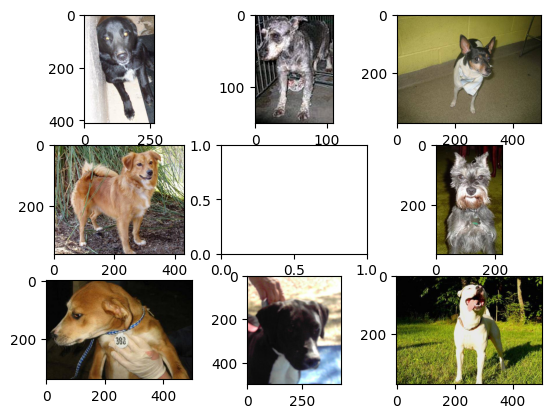

In [47]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/tmp/dog-cat-full-dataset-master/data/train/dogs/'
# plot first few images
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  if i == 4:
    pass
  else:
    # define subplot
    # define filename
    filename = folder + 'dog.1000' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

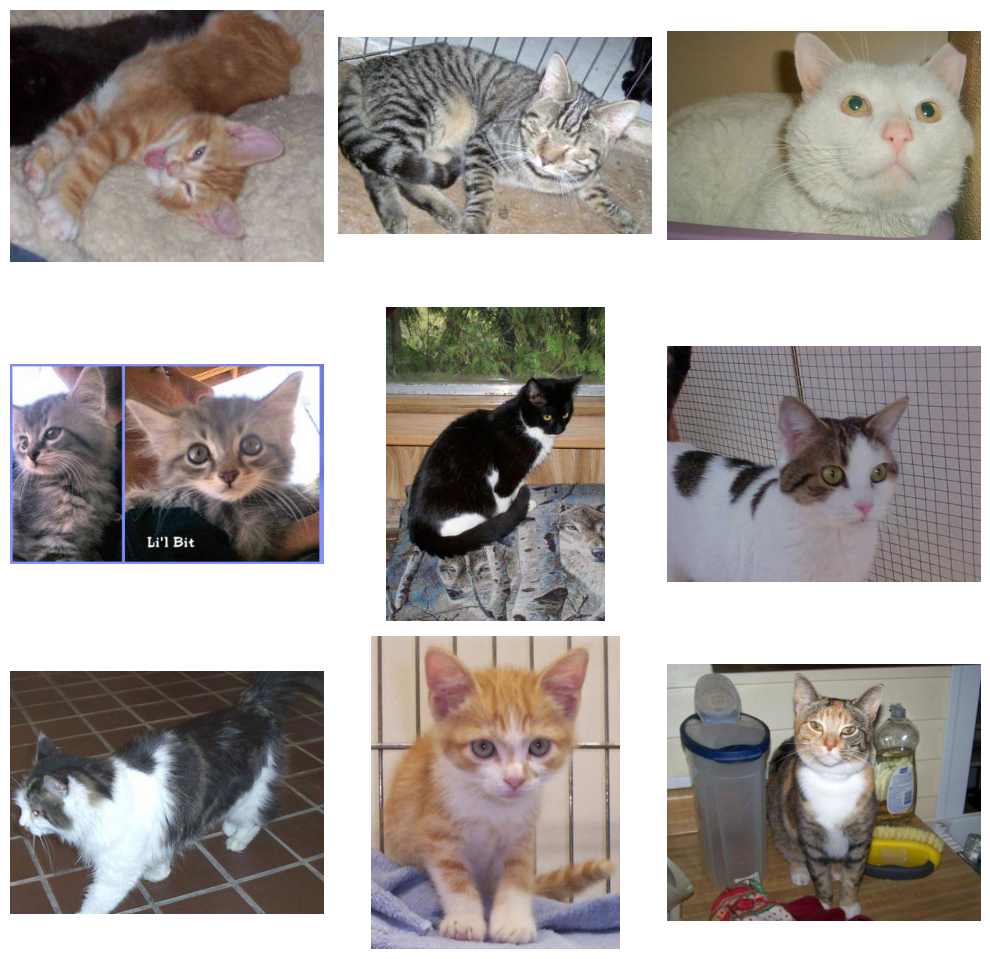

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to the folder containing images
image_folder = '/tmp/dog-cat-full-dataset-master/data/train/cats/'

# Get list of image file names
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Select the first 9 images (or fewer if there are not enough)
image_files = image_files[:9]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each image file and corresponding subplot axis
for i, ax in enumerate(axes):
    if i < len(image_files):
        img_path = os.path.join(image_folder, image_files[i])
        img = mpimg.imread(img_path)
        ax.imshow(img)
    ax.axis('off')  # Hide the axis

# Display the plot
plt.tight_layout()
plt.show()


# Create a file dataframe

In [45]:
# now extract the labels from the file names
import os.path

# Convert PosixPath objects to strings
filepaths_train = [str(filepath) for filepath in filepaths_train]

# Extracting labels from the file paths
labels_train = [filepath.split('/')[-2] for filepath in filepaths_train]

# Creating DataFrame
df_train = pd.DataFrame({'filepath': filepaths_train, 'label': labels_train})
df_train


,filepath,label
0,/tmp/dog-cat-full-dataset-master/data/train/do...,dogs
1,/tmp/dog-cat-full-dataset-master/data/train/do...,dogs
2,/tmp/dog-cat-full-dataset-master/data/train/do...,dogs
3,/tmp/dog-cat-full-dataset-master/data/train/do...,dogs
4,/tmp/dog-cat-full-dataset-master/data/train/do...,dogs
...,...,...
1995,/tmp/dog-cat-full-dataset-master/data/train/ca...,cats
1996,/tmp/dog-cat-full-dataset-master/data/train/ca...,cats
1997,/tmp/dog-cat-full-dataset-master/data/train/ca...,cats
1998,/tmp/dog-cat-full-dataset-master/data/train/ca...,cats


In [9]:
# Do the same for test data
# Convert PosixPath objects to strings
filepaths_test = [str(filepath) for filepath in filepaths_test]

# Extracting labels from file paths
labels_test = [filepath.split('/')[-2] for filepath in filepaths_test]

# Creating DataFrame
df_test = pd.DataFrame({'filepath': filepaths_test, 'label': labels_test})
df_test

,filepath,label
0,/tmp/dog-cat-full-dataset-master/data/test/dog...,dogs
1,/tmp/dog-cat-full-dataset-master/data/test/dog...,dogs
2,/tmp/dog-cat-full-dataset-master/data/test/dog...,dogs
3,/tmp/dog-cat-full-dataset-master/data/test/dog...,dogs
4,/tmp/dog-cat-full-dataset-master/data/test/dog...,dogs
...,...,...
395,/tmp/dog-cat-full-dataset-master/data/test/cat...,cats
396,/tmp/dog-cat-full-dataset-master/data/test/cat...,cats
397,/tmp/dog-cat-full-dataset-master/data/test/cat...,cats
398,/tmp/dog-cat-full-dataset-master/data/test/cat...,cats


# Load Image Data

In [10]:
import tensorflow as tf
import keras

# ImageDataGenerator is an object which allows to load only a batch of images at a time,
# perform the training on them and then recycle the memory so we do not run out of it

# you can specify in it what preprocessing you want to apply on the images
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, # we rescale for the rgb values tob in the range [0,1]
    horizontal_flip=True, # we do a horizontal flip on the image
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

# on the test images we only rescale them to be b/w (0, 1)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
    )

In [11]:
# Apply the ImageDataGenerator on the train, validation and test data
# flow_from_dataframe specifies that the images will be extracted from a df
train_images = train_generator.flow_from_dataframe(
    dataframe = df_train,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224), # standard image size in image classification
    color_mode='rgb',
    class_mode='binary', # we are doing a 0,1 classification
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training' # specify validation if you are doing that one
)

validation_images = train_generator.flow_from_dataframe(
    dataframe = df_train,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224), # standard image size in image classification
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation' # specify validation if you are doing that one
)

test_images = test_generator.flow_from_dataframe(
    dataframe = df_test,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224), # standard image size in image classification
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


# Training
Next, we build the model layer-by-layer

In [22]:
inputs = tf.keras.Input(shape=(224, 224, 3)) # 3 is the rgb color channel

# The filter specifies how many times should we go over/scan each image
# After this first convolutional layer we lose a pixel from each side -
# (so the shape becomes (222, 222, 16) because of the kernel size
# and the 16 comes from the filters
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)

# use MaxPool layer between Convolutional layers
# MaxPool reduces the dimentionality of the data and extracts the most important features from it
# it's a sort of a more high level view of the data at which the next Conv2D layer looks at
# After this layer the shape becomes (111, 111, 16) so we have a reduced dimension size
x = tf.keras.layers.MaxPool2D()(x)

# after the MaxPool we get a reduced version of the original image
# after each MaxPool we allow the next Conv2D layer to grasp higher level relationships between features
# (here a feature is a pixel)
# After the next COnv2D layer we lose again a pixel on each side because of the kernel
# so the shape is (109, 109, 32)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)

# After this 2nd MaxPool the shape is 54,54,32
x = tf.keras.layers.MaxPool2D()(x)

# we can add another conv2d layer with a MaxPool2D
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)

In [23]:
# Take a look at x which is a tensor
x

<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'max_pooling2d_6')>

In [24]:
# the shape needs to be reduced to 1 dimension
# x = tf.keras.layers.Flatten()(x)
# this method is not optimal since there is most likely redundant information
# in the 93k features so we use another method

In [25]:
# GlobalAveragePooling2D instead of flattening will average accross the first 2 dimensions
# such that we end with 32 features
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [26]:
# Use 2 Dense layers with 128 neurons and relu activation
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)

# finally we set to 1 neuron because we want 1 output
# we will output a single probability estimate for the class
# sigmoid is used for binary classification
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [27]:
# the output will say what is the prorbability of the image
# being a 1 (so a dog)
train_images.class_indices

{'cats': 0, 'dogs': 1}

In [28]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data = validation_images,
    epochs=100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True
        ),

        # this callbacks reduces the learning rate when it notices the validation loss has reached its plateau
        # you want to give it shorter patience than the early stopping because
        # you want to converge the LR before training stops
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=20
        )
    ]
)

Epoch 1/100
50/50 [==============================] - 100s 2s/step - loss: 0.6717 - accuracy: 0.6200 - val_loss: 0.8703 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
50/50 [==============================] - 91s 2s/step - loss: 0.6640 - accuracy: 0.6250 - val_loss: 0.9058 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
50/50 [==============================] - 97s 2s/step - loss: 0.6617 - accuracy: 0.6250 - val_loss: 0.9995 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
50/50 [==============================] - 95s 2s/step - loss: 0.6561 - accuracy: 0.6250 - val_loss: 1.0562 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
50/50 [==============================] - 98s 2s/step - loss: 0.6529 - accuracy: 0.6250 - val_loss: 1.0012 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
50/50 [==============================] - 98s 2s/step - loss: 0.6615 - accuracy: 0.6250 - val_loss: 0.8209 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/100
50/50 [==============================] 

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496 

# Results & Model Evaluation

In [30]:
results = model.evaluate(test_images, verbose=0)

print("    Test loss: {:.5f}".format(results[0]))
print("Test accuracy: {:.2f}%".format(results[1] * 100))

    Test loss: 0.65162
Test accuracy: 63.00%


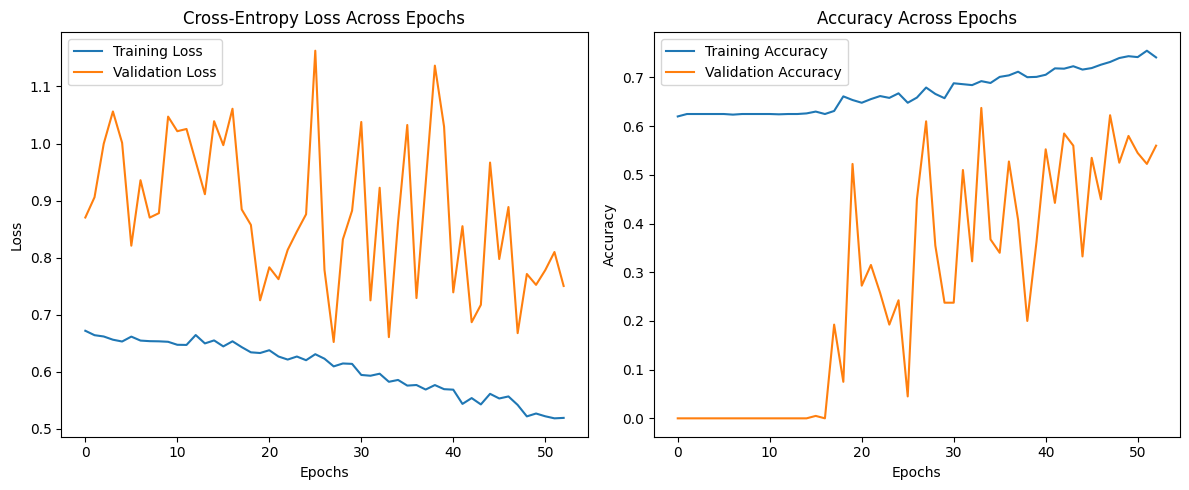

In [46]:
# Extract loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Cross-Entropy Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

13/13 [==============================] - 11s 807ms/step


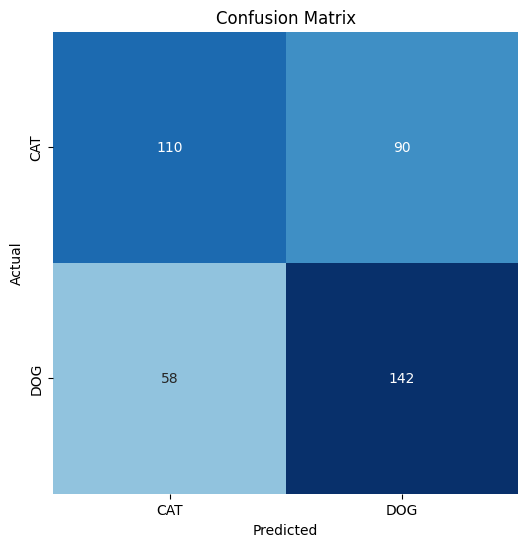

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
predictions = (model.predict(test_images) >= 0.5).astype(int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['CAT', 'DOG'])
plt.yticks(ticks=[0.5, 1.5], labels=['CAT', 'DOG'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
predictions = (model.predict(test_images)).astype(float)
predictions

13/13 [==============================] - 7s 528ms/step


array([[0.47049323],
       [0.46034798],
       [0.38439324],
       [0.50088555],
       [0.68219316],
       [0.56340182],
       [0.60110402],
       [0.64216721],
       [0.46679729],
       [0.46250781],
       [0.64182657],
       [0.75461286],
       [0.61136484],
       [0.89923459],
       [0.35669652],
       [0.64686942],
       [0.49226609],
       [0.50043166],
       [0.7534256 ],
       [0.78144526],
       [0.22768301],
       [0.30785584],
       [0.77815068],
       [0.6555562 ],
       [0.41092849],
       [0.32386714],
       [0.70213604],
       [0.72065556],
       [0.74028301],
       [0.52226913],
       [0.45989633],
       [0.70096594],
       [0.35381606],
       [0.75920415],
       [0.29356018],
       [0.64883876],
       [0.59641325],
       [0.68608123],
       [0.46783429],
       [0.68404597],
       [0.69238412],
       [0.798648  ],
       [0.61054641],
       [0.36616954],
       [0.6553461 ],
       [0.61763811],
       [0.67108947],
       [0.620